Question 3

(a)

write a function for calculating MSE

In [0]:
def  MSE(w,X,y):
  n,d = X.shape
  Xw = X.dot(w)#predictions
  mse = (1/n) * (np.linalg.norm(y-Xw))**2
  return mse

Implement a function for learning the parameters of a linear model for a given tranining data with user-specified learning rate *learning_rate* and number of epochs *epochnumber*.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def GD (x,y,learning_rate,epochnumber):
  n,d = x.shape
  #print("n:",n," ","d:",d)
  x0 = np.ones((n,1))
  X = np.hstack((x0,x))
  #print(X)
  #print("n:",n," ","d:",d)
  
  w = np.random.randn(d+1,1)
  
  optimalw = np.dot ( np.linalg.inv( np.dot(X.T,X) ) , (np.dot(X.T,y)) ) #use formula
  print("optimalw by formula:")
  print(optimalw)
  
  mse = []
  R2 = []
  for it in range(epochnumber):
    Xw = np.dot(X,w)
    w = w -(2/n)*learning_rate*( X.T.dot((Xw - y)))
    mse.append(MSE(w,X,y))
    #calculating R2 (better if close to 1)
    FVU = MSE(w,X,y) / (np.std(y)**2)
    R2.append(1-FVU)
  print("Training Result:")
  #print("MSE: ",mse[-1])
  #print("R^2: ",R2[-1])
  
  %matplotlib inline
  plt.figure(1)
  plt.title("MSE Variation with epoch")
  plt.plot(range(epochnumber),mse)
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.grid(True)
  plt.figure(2)
  plt.title("R^2 Variation with epoch")
  plt.plot(range(epochnumber),R2,'r')
  plt.xlabel('Epoch')
  plt.ylabel('R^2')
  plt.grid(True)
  
  return w

(b)

import gulcose data used in Lecture 2

In [3]:
from sklearn import datasets, linear_model
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
x = diabetes.data
y = diabetes.target

print(x.shape)
#print(y.shape)
print(y.shape)

(442, 10)
(442,)


split 70-30 test-train data

In [4]:
xtest = np.split(x,[310,442],axis = 0)[0]
xtrain = np.split(x,[310,442],axis = 0)[1]
print("x shape: ",x.shape," xtest shape :",xtest.shape," xtrain shape: ",xtrain.shape)

ytest = np.split(y,[310,442])[0]
ytrain = np.split(y,[310,442])[1]
print("y shape: ",y.shape," ytest shape :",ytest.shape," ytrain shape: ",ytrain.shape)

x shape:  (442, 10)  xtest shape : (310, 10)  xtrain shape:  (132, 10)
y shape:  (442,)  ytest shape : (310,)  ytrain shape:  (132,)


Train linear model by sklearn

In [5]:
regr = linear_model.LinearRegression()
regr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

print out intercept and coefficients by sklearn

In [6]:
print("intercep: ",regr.intercept_)
print("coefficients: ",regr.coef_)

intercep:  152.19232660772457
coefficients:  [  -22.36235507  -199.24901422   466.5438688    408.97375681
 -1177.29512755   832.96506034   192.22760442   179.8446175
   871.38750025    -9.2876511 ]


Print out R^2 number of test data's prediction by linear model created by sklearn

In [7]:
ytest_pred = regr.predict(xtest)
RSS = np.mean((ytest_pred-ytest)**2)/(np.std(ytest)**2)
Rsq = 1-RSS
#print("RSS per sample = {0:f}".format(RSS))
print("R^2 = {0:f}".format(Rsq))

R^2 = 0.496374


Validate own function:

(1)Print out the result of using own training function: a combination of intercept and coefficient

(2)It will firstly (by function itself) print out optimal coefficients produced by using (X^T*X)^(-1)*X^T*y and MSE, R^2 value after using my training function

(3)At the buttom there will be two graph showing variation of MSE, R^2 with epoch

Train my model

optimalw by formula:
[[  152.19232661]
 [  -22.36235507]
 [ -199.24901422]
 [  466.5438688 ]
 [  408.97375681]
 [-1177.29512755]
 [  832.96506034]
 [  192.22760442]
 [  179.8446175 ]
 [  871.38750025]
 [   -9.2876511 ]]
Training Result:
[[ 151.87297524]
 [  -9.68204348]
 [-180.37387961]
 [ 481.22204134]
 [ 400.99797935]
 [-496.73613722]
 [ 321.27925011]
 [-117.49438036]
 [  65.55076943]
 [ 591.93106102]
 [  -5.07843679]]


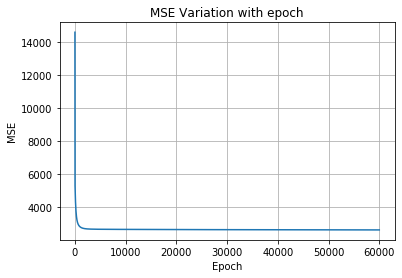

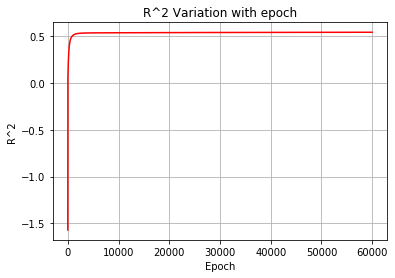

In [20]:
ytrain = ytrain.reshape((132,1))#reshape y to colum vector
ytest = ytest.reshape((310,1))

np.set_printoptions(suppress=True)
wtrain = GD(xtrain,ytrain,0.2,60000)
print(wtrain)

test my model and report R^2 (R^2 by sklearn is 0.496374):

In [19]:
Xtest = np.hstack((np.ones((310,1)),xtest))
#print(Xtest.shape)
MSEtest = MSE(wtrain,Xtest,ytest)
print("MSEtest = ",MSEtest)
FVUtest = MSEtest / (np.std(ytest)**2)
R2test = (1-FVUtest)
print("R^2 = {0:f}".format(R2test))

MSEtest =  20460.39844270822
R^2 = -2.402585


*Question* 4:
 
upload related .csv files to colab first

(a)read in data

In [21]:
import numpy as np
import pandas as pd
names =[
't', # Time (secs)
'q1', 'q2', 'q3', # Joint angle
'dq1', 'dq2', 'dq3', # Joint velocity
'I1', 'I2', 'I3', # Motor current (A)
'eps21', 'eps22', 'eps31', 'eps32', # Strain measurements
'ddq1', 'ddq2', 'ddq3' # Joint accelerations
]
df = pd.read_csv('exp_train.csv', header=None,sep=',',names=names, index_col=0)
df.head(6)


,q1,q2,q3,dq1,dq2,dq3,I1,I2,I3,eps21,eps22,eps31,eps32,ddq1,ddq2,ddq3
t,,,,,,,,,,,,,,,,
0.00,-0.000007,2.4958,-1.1345,-7.882100e-21,-4.940656e-321,3.913100e-29,-0.081623,-0.40812,-0.30609,-269.25,-113.20,3.5918,1.57860,-9.904900e-19,-6.210306e-319,4.917400e-27
0.01,-0.000007,2.4958,-1.1345,-2.258200e-21,-4.940656e-321,2.626200e-31,-0.037411,-0.37241,-0.26698,-270.91,-116.05,1.4585,-1.73980,4.248100e-19,-1.766878e-319,-1.381100e-27
0.02,-0.000007,2.4958,-1.1345,-6.469800e-22,-4.940656e-321,1.762500e-33,-0.066319,-0.40302,-0.31459,-269.25,-112.97,3.5918,0.86753,3.233800e-19,-4.990557e-320,-4.117300e-28
0.03,-0.000007,2.4958,-1.1345,-1.853600e-22,-4.940656e-321,1.182800e-35,-0.068020,-0.43703,-0.28398,-269.97,-114.39,1.6956,-0.08059,1.500500e-19,-1.394253e-320,-1.173100e-28
0.04,-0.000007,2.4958,-1.1345,-5.310600e-23,-4.940656e-321,-5.270900e-03,-0.052715,-0.40472,-0.30779,-269.97,-114.15,3.1177,0.86753,5.932400e-20,-3.581976e-321,-3.770800e-01
0.05,-0.000007,2.4958,-1.1345,-1.521500e-23,-4.940656e-321,3.252600e-04,-0.088425,-0.42342,-0.29589,-269.25,-114.15,2.4066,-0.08059,2.164600e-20,-1.141292e-321,2.930300e-01


(b)create training data

In [22]:
df1 = df [['q2','dq2','eps21', 'eps22', 'eps31',
'eps32','ddq2']]
y = np.array(df['I2']).reshape(8000,1)
X = np.array(df1)
#print(y.shape)
print("n: ",X.shape[0]," d: ",X.shape[1])
#print(X)


n:  8000  d:  7


(c)fit a linear model by sklearn

In [23]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X,y)

intercept = regr.intercept_
coef = regr.coef_
print("intercpt: ",intercept )
print("w: ",coef)

intercpt:  [-0.08408084]
w:  [[ 0.06255018  0.20584896  0.00118784  0.00044457 -0.0031362   0.00603298
   0.05487097]]


Report MSE

In [24]:
y_pred = regr.predict(X)
mse = np.mean((y_pred-y)**2)
RSS = mse/(np.std(y)**2)
Rsq = 1-RSS
print("MSE of this model: ",mse)
print("RSS per sample = {0:f}".format(RSS))
print("R^2 = {0:f}".format(Rsq))

MSE of this model:  0.010936466882766276
RSS per sample = 0.095833
R^2 = 0.904167


(d)

read in test data:

In [25]:
import numpy as np
import pandas as pd
names =[
't', # Time (secs)
'q1', 'q2', 'q3', # Joint angle
'dq1', 'dq2', 'dq3', # Joint velocity
'I1', 'I2', 'I3', # Motor current (A)
'eps21', 'eps22', 'eps31', 'eps32', # Strain measurements
'ddq1', 'ddq2', 'ddq3' # Joint accelerations
]
df = pd.read_csv('exp_test.csv', header=None,sep=',',names=names, index_col=0)
df.head(6)



,q1,q2,q3,dq1,dq2,dq3,I1,I2,I3,eps21,eps22,eps31,eps32,ddq1,ddq2,ddq3
t,,,,,,,,,,,,,,,,
0.00,-0.000007,1.9024,0.26063,-0.000364,4.940656e-321,0.012596,-0.096928,-0.15134,-0.017005,-130.83,-41.856,-6.3635,5.13410,-0.045712,6.210306e-319,1.582900
0.01,0.000013,1.9024,0.26073,0.000739,4.940656e-321,0.012095,-0.028908,-0.11903,-0.020406,-138.18,-51.100,-14.6590,-5.05820,0.125580,1.766878e-319,0.414660
0.02,-0.000007,1.9024,0.26086,-0.000580,4.940656e-321,0.011596,-0.059517,-0.13944,-0.047614,-139.36,-51.812,-14.6590,-5.29520,-0.130080,4.990557e-320,0.082286
0.03,0.000013,1.9024,0.26099,0.001409,4.940656e-321,0.013933,-0.079923,-0.15304,-0.023807,-135.57,-48.019,-11.3410,-0.79168,0.213010,1.394253e-320,0.190650
0.04,-0.000007,1.9024,0.26110,-0.001273,4.940656e-321,0.010793,-0.025507,-0.12924,-0.006802,-135.81,-49.204,-12.0520,-2.21390,-0.276490,3.581976e-321,-0.170400
0.05,-0.000007,1.9024,0.26124,0.001928,4.940656e-321,0.011915,-0.083324,-0.14964,-0.034010,-139.60,-53.471,-16.0820,-6.95450,0.323560,1.141292e-321,0.031745


Create test data

In [26]:
df1 = df [['q2','dq2','eps21', 'eps22', 'eps31',
'eps32','ddq2']]#.dropna()

y = np.array(df['I2']).reshape(8000,1)
x = np.array(df1)
#print(y.shape)
print("n: ",x.shape[0]," d: ",x.shape[1])
#print(x)

n:  8000  d:  7


use linear model built above and calculating MSE

In [27]:
y_pred = regr.predict(x)
mse = np.mean((y_pred-y)**2)
print("MSE: ",mse)

MSE:  0.009723098281465446
